# Monte-Carlo-Methode
Bei der Monte-Carlo-Methode approximiert man π durch sehr spektakuläre stochastische Überlegung.

Das heißt man generiert ein Einheitsquadrat und in diesem quadrat bildet man ein Enheitsviertelkreis, über dem sich ein Zufallsregen ergießt. Nun zählt man wie viel Tropfen im Kreis gelandet sind. Die Tropfen im Kreis im Verhältnis zu der Gesamtzahl gibt die Wahrescheinlichkeit an, dass der nächste Tropfen auch im Kreis landet, wodurch die Wahrscheinlichkeit auch dem  Verhältnis der Kreisfläche zur Gesamtfläch entspricht.

Das heißt:

$$
\frac{Punkte im Kreis}{Punkte im Quadrat} = \frac{Kreisfläche}{Quadratfläche} = \frac{\pi r²}{(2r)²} = \frac{\pi}{4}
$$

In [ ]:
"""Exercise 1 Monte-Carlo group Progr3I3Gr7"""

import random
import math
import time

TRIALS = int(input("Anzahl der Punkte in Millionen: ")) * 1000000
INSIDE = 0
start = time.time()
def count_drops_in_circle(total_amount, count):
    """The Function estimate Pi via the monte carlo concept"""
    for _ in range(total_amount):
        x_coord = random.random()
        y_coord = random.random()
        length = math.sqrt(x_coord ** 2 + y_coord ** 2)
        if length <= 1:
            count += 1
    estimate_pi = 4*count/total_amount
    print(estimate_pi)
    end = time.time()
    duration = end - start
    print(time.strftime("%H:%M:%S", time.gmtime(duration)))

if __name__ == "__main__":
    count_drops_in_circle(TRIALS, INSIDE)
 

# Traveling-Salesman-Problem

Beim Traveling-Salesman-Problem oder auch Problem des Handlungsreisenden geht es darum, eine Tour durch eine bestimmte Anzahl an Städten zu machen um dann am Anfangspunkt zu enden. Dabei versucht man den kleinstmöglichen bzw schnellsten weg herauszufinden. Bei 10 Städten gäbe es schon 1814400 potenzielle routen.    


Amount of Cities: 50


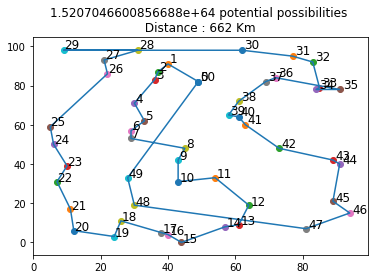

 2348 Km This is the euclidean distance from the random given points 
 [[49, 82], [62, 98], [57, 8], [40, 91], [12, 6], [28, 33], [44, 0], [54, 33], [84, 78], [43, 31], [5, 59], [72, 84], [89, 42], [63, 60], [81, 7], [73, 48], [64, 19], [91, 78], [89, 21], [45, 48], [61, 64], [30, 19], [29, 53], [40, 4], [38, 5], [10, 39], [69, 82], [85, 79], [21, 93], [91, 40], [94, 15], [26, 11], [43, 42], [7, 31], [61, 72], [33, 62], [58, 65], [61, 9], [24, 3], [37, 87], [11, 17], [9, 98], [77, 95], [83, 92], [31, 98], [22, 86], [30, 71], [36, 83], [6, 50], [29, 57], [49, 82]]

 662 Km This is the euclidean distance from the salesman route 
 [[49, 82], [40, 91], [37, 87], [36, 83], [30, 71], [33, 62], [29, 57], [29, 53], [45, 48], [43, 42], [43, 31], [54, 33], [64, 19], [61, 9], [57, 8], [44, 0], [40, 4], [38, 5], [26, 11], [24, 3], [12, 6], [11, 17], [7, 31], [10, 39], [6, 50], [5, 59], [22, 86], [21, 93], [31, 98], [9, 98], [62, 98], [77, 95], [83, 92], [85, 79], [84, 78], [91, 78], [72, 84], [69,

In [9]:
"""Exercise 1 Traveling-Salesman group Progr3I3Gr7"""
%matplotlib inline
import math
import random
import matplotlib.pyplot as plt

CITY_AMOUNT = int(input("Amount of Cities: "))
CITIES = [random.sample(range(100), 2) for _ in range(CITY_AMOUNT)]
SALESMAN_ROUTE = CITIES.copy()


def total_distance(points):
    """
    This calculate the total distance between a sum of points

    :param points: the List of Cities
    :return: The euclidean distance between the points
    """

    dist = []
    this_item = points[0]
    for item in points[1:]:
        prev_item = this_item
        this_item = item
        coord_dist = distance(prev_item, this_item)
        dist.append(coord_dist)
    return int(sum(dist))


def distance(position1, position2):
    """
    This method return the Distance between two points

    :param position1: That's the act_city
    :param position2: This is one of the left CITIES at the List
    :return:
    """

    return math.sqrt(
        ((position1[0] - position2[0]) ** 2) + ((position1[1] - position2[1]) ** 2))


def potential_possibilities(amount):
    """
    The potential_possibilities does what the name says

    :param amount: The amount of cities the Salesman have to pass
    :return: the potential possibilities
    """
    if amount < 171:
        return "{:,}".format((math.factorial(amount)) / 2)
    return "to many to print :("


def choose_shortest_dist(act_city, index):
    """
    In this Function all te magic happen

    :param act_city: This is the actual city where the Salesman stay
    :param index: The position where it insert the next position
    :return: It returns the completed and finished SALESMAN_ROUTE
    """

    dist = float("inf")
    point = 0
    for i in range(act_city + 1, CITY_AMOUNT):
        temp = distance(SALESMAN_ROUTE[act_city], SALESMAN_ROUTE[i])
        if temp < dist:
            point = i
            dist = temp
    if index < CITY_AMOUNT:
        point_backup = SALESMAN_ROUTE[point]
        SALESMAN_ROUTE.remove(SALESMAN_ROUTE[point])
        SALESMAN_ROUTE.insert(index, point_backup)
        next_index = index + 1
        next_to_act_city = act_city + 1
        choose_shortest_dist(next_to_act_city, next_index)  # REKURSION !!!


def plot_trav_salesman(route):
    """
    This function plot the traveling salesman problem

    :param route: The function get the route of the traveling salesman
    :return: It return the route the salesman take
    """
    if len(route) < 1000:
        index = 0
        num = [i for i in range(len(route))]
        for i in route:
            plt.scatter(i[0], i[1])
            plt.text(i[0] * (1 + 0.01), i[1] * (1 + 0.01), num[index], fontsize=12)
            index += 1
        x_coord = [i[0] for i in route]
        y_coord = [i[1] for i in route]
        plt.plot(x_coord, y_coord)
        plt.title("%s potential possibilities \n Distance : %d Km "
                  % (potential_possibilities(CITY_AMOUNT), total_distance(SALESMAN_ROUTE)))
        plt.savefig("travel_salesman_graph.png", quality=100, dpi=300)
        plt.show()


if __name__ == "__main__":
    choose_shortest_dist(0, 1)
    SALESMAN_ROUTE.append(CITIES[0])
    CITIES.append(CITIES[0])
    plot_trav_salesman(SALESMAN_ROUTE)
    print(" %d Km This is the euclidean distance from the random given points \n"
          % (total_distance(CITIES)), CITIES)
    print("\n %d Km This is the euclidean distance from the salesman route \n"
          % (total_distance(SALESMAN_ROUTE)), SALESMAN_ROUTE)
    print("\n By %d Citys you have %s potential possibilities"
          % (CITY_AMOUNT, potential_possibilities(CITY_AMOUNT)))